# La durée du voyage en taxi à New York

## Petit resumé et points de difficultées

## Librairies et fonctions utiles

In [24]:
# Directive pour afficher les graphiques dans Jupyter
%matplotlib inline

In [25]:
# Pandas : librairie de manipulation de données
# NumPy : librairie de calcul scientifique
# MatPlotLib : librairie de visualisation et graphiques
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

In [26]:
#lecture du dataset
voyage = pd.read_csv("taxiNewYork.csv")

In [27]:
voyage.head(10)


id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   
5  id0801584          2  2016-01-30 22:01:40  2016-01-30 22:09:03   
6  id1813257          1  2016-06-17 22:34:59  2016-06-17 22:40:40   
7  id1324603          2  2016-05-21 07:54:58  2016-05-21 08:20:49   
8  id1301050          1  2016-05-27 23:12:23  2016-05-27 23:16:38   
9  id0012891          2  2016-03-10 21:45:01  2016-03-10 22:05:26   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   
5                6        -73.982857        40.742195         -73.992081   
6                4        -73.969017        40.757839         -73.957405   
7                1        -73.969276        40.797779         -73.922470   
8                1        -73.999481        40.738400         -73.985786   
9                1        -73.981049        40.744339         -73.973000   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435  
5         40.749184                  N            443  
6         40.765896                  N            341  
7         40.760559                  N           1551  
8         40.732815                  N            255  
9         40.789989                  N           1225

In [28]:
voyage.shape

(1458644, 11)

## Champs de données

In [29]:
voyage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [30]:
voyage[voyage.trip_duration<800].plot(kind="scatter", x="pickup_longitude", y="pickup_latitude", c="trip_duration", cmap="rainbow", s=3, figsize=(10,10))

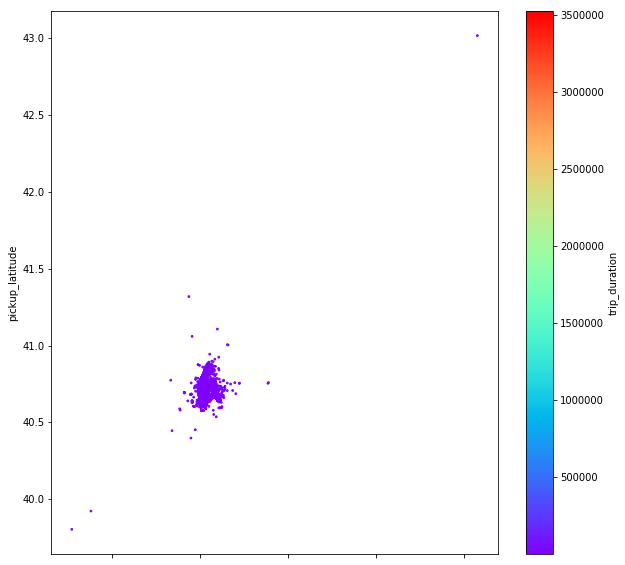

In [31]:
voyage[voyage.trip_duration>1225].plot(kind="scatter", x="pickup_longitude", y="pickup_latitude", c="trip_duration", cmap="rainbow", s=3, figsize=(10,10))

In [32]:
voyage.count()

id                    1458644
vendor_id             1458644
pickup_datetime       1458644
dropoff_datetime      1458644
passenger_count       1458644
pickup_longitude      1458644
pickup_latitude       1458644
dropoff_longitude     1458644
dropoff_latitude      1458644
store_and_fwd_flag    1458644
trip_duration         1458644
dtype: int64

In [33]:
voyage['year'] = pd.DatetimeIndex(voyage['pickup_datetime']).year #année corespondant à la date
voyage['month'] = pd.DatetimeIndex(voyage['pickup_datetime']).month
voyage['day'] = pd.DatetimeIndex(voyage['pickup_datetime']).day

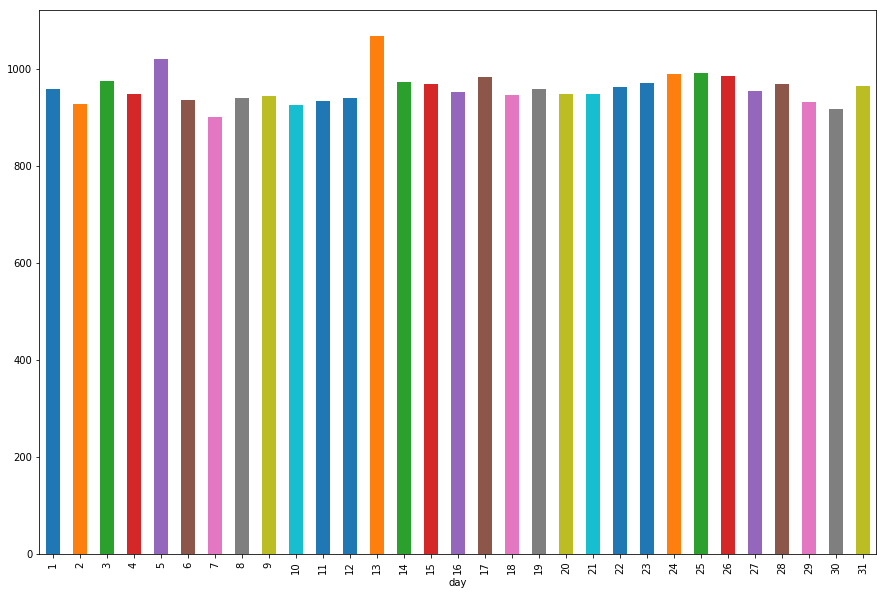

In [34]:
voyage.groupby(['day'])['trip_duration'].mean().plot(kind = 'bar', figsize=(15,10))


In [35]:
voyage.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  year  month  day  
0         40.765602                  N            455  2016      3   14  
1         40.731152                  N            663  2016      6   12  
2         40.710087                  N           2124  2016      1   19  
3         40.706718                  N            429  2016      4    6  
4         40.782520                  N            435  2016      3   26

In [36]:
#voyage.groupby(['pickup_latitude'])['dropoff_latitude'].mean().plot(kind = 'bar', figsize=(15,10))

In [37]:
#voyage.groupby(['dropoff_longitude'])['dropoff_latitude'].mean().plot(kind = 'bar', figsize=(15,10))

In [38]:
voyage = voyage.drop(['id','vendor_id', 'store_and_fwd_flag','pickup_datetime', 'dropoff_datetime' ], axis=1) #nous avons ici la durée finale, donc les valeurs de 
                                                    # pickup_datetime et dropoff_datetime ne nous pas utiles

In [39]:
voyage.head()

passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude  trip_duration  year  month  day  
0         40.765602            455  2016      3   14  
1         40.731152            663  2016      6   12  
2         40.710087           2124  2016      1   19  
3         40.706718            429  2016      4    6  
4         40.782520            435  2016      3   26

# Recherche de corrélations

In [40]:
tabcorr = voyage.corr()     # on peut utiliser aussi bos.corr(method='pearson') par exemple

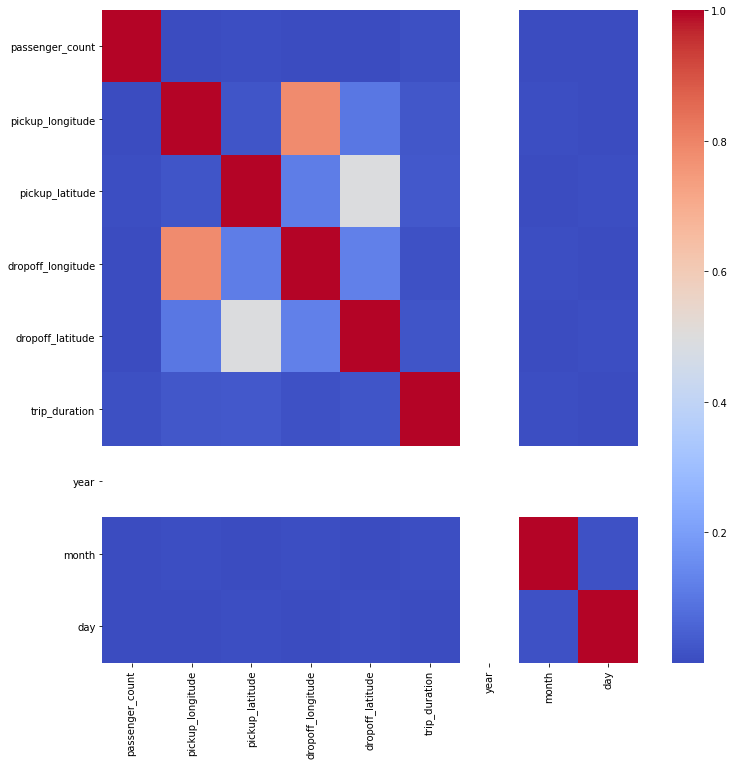

In [41]:
plt.figure(figsize=(12,12))
sns.heatmap(abs(tabcorr), cmap="coolwarm")

In [42]:
#sns.clustermap(abs(tabcorr), cmap="coolwarm")

Dendrogramme des corrélations entre les caractéristiques. On utilise une forme "condensée" de la matrice de corrélation. linkage permet de calculer les distances entre caractéristiques à partir des corrélations

In [43]:
from scipy.cluster import hierarchy as hc

corr = 1 - voyage.corr()
corr_condensed = hc.distance.squareform(corr)
link = hc.linkage(corr_condensed, method='ward')#crée les classes
plt.figure(figsize=(12,12))
den = hc.dendrogram(link, labels=voyage.columns, orientation='left', leaf_font_size=10)#abre qui suit

ValueError: Distance matrix 'X' must be symmetric.

In [44]:
correlations = tabcorr.trip_duration
print(correlations)

passenger_count      0.008471
pickup_longitude     0.026542
pickup_latitude     -0.029204
dropoff_longitude    0.014678
dropoff_latitude    -0.020677
trip_duration        1.000000
year                      NaN
month                0.006607
day                  0.000566
Name: trip_duration, dtype: float64


In [45]:
correlations = correlations.drop(['trip_duration'],axis=0)

In [50]:
print(abs(correlations).sort_values(ascending=False))

pickup_latitude      0.029204
pickup_longitude     0.026542
dropoff_latitude     0.020677
dropoff_longitude    0.014678
passenger_count      0.008471
month                0.006607
day                  0.000566
year                      NaN
Name: trip_duration, dtype: float64


# Régression linéaire multiple

In [51]:
voyage.head()

passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude  trip_duration  year  month  day  
0         40.765602            455  2016      3   14  
1         40.731152            663  2016      6   12  
2         40.710087           2124  2016      1   19  
3         40.706718            429  2016      4    6  
4         40.782520            435  2016      3   26

In [52]:
continuous_features = ['passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','trip_duration']
discrete_features = ['month','year','day']

In [53]:
VOYAGE1 = voyage[voyage.trip_duration<800].drop(discrete_features, axis=1)

In [54]:
X = VOYAGE1.drop(['trip_duration'], axis=1)
y = VOYAGE1.trip_duration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
#X_train = X[:4,:]
#y_train = X[3:,:]

# Données de test

In [75]:
#lecture du dataset de test
data_test = pd.read_csv("test.csv")

In [74]:
#data_test.head()

id  vendor_id      pickup_datetime  passenger_count  \
0  id3004672          1  2016-06-30 23:59:58                1   
1  id3505355          1  2016-06-30 23:59:53                1   
2  id1217141          1  2016-06-30 23:59:47                1   
3  id2150126          2  2016-06-30 23:59:41                1   
4  id1598245          1  2016-06-30 23:59:33                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.988129        40.732029         -73.990173         40.756680   
1        -73.964203        40.679993         -73.959808         40.655403   
2        -73.997437        40.737583         -73.986160         40.729523   
3        -73.956070        40.771900         -73.986427         40.730469   
4        -73.970215        40.761475         -73.961510         40.755890   

  store_and_fwd_flag  
0                  N  
1                  N  
2                  N  
3                  N  
4                  N

In [59]:
#data_test = data_test.drop(['vendor_id'], axis=1)

In [60]:
#data_test.head()

In [61]:
#X_test = data_test.iloc[:5,:]
#y_test = data_test.iloc[4:,:]

#X_test = X_test.reshape(-1,1)

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
LinearRegre = LinearRegression()
LinearRegre.fit(X_train, y_train)            # apprentissage
y_predi = LinearRegre.predict(X_test)         # prédiction sur l'ensemble de test

Text(0.5,1,'durées reelles vs predictions')

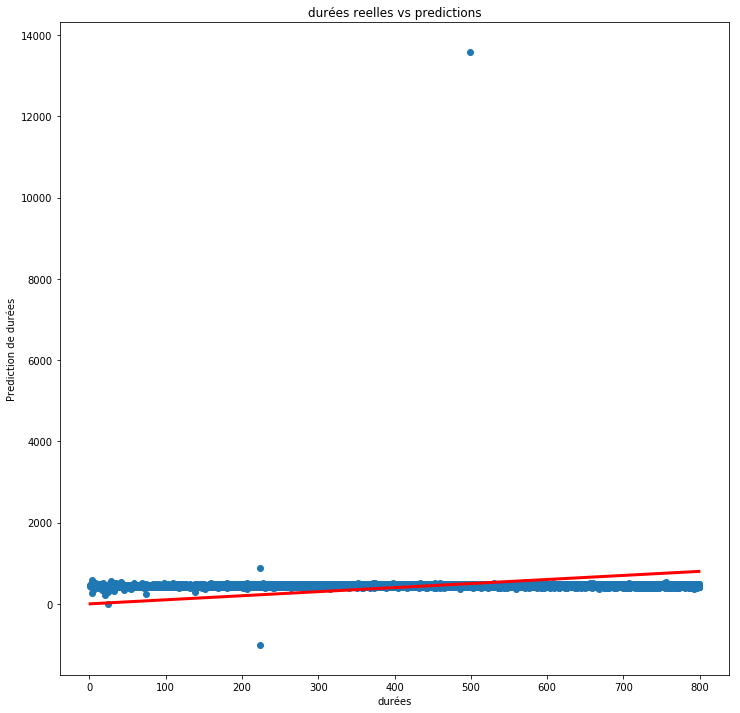

In [64]:
plt.figure(figsize=(12,12))
plt.scatter(y_test, y_predi)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='red', linewidth=3)
plt.xlabel("durées")
plt.ylabel("Prediction de durées")
plt.title("durées reelles vs predictions")

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


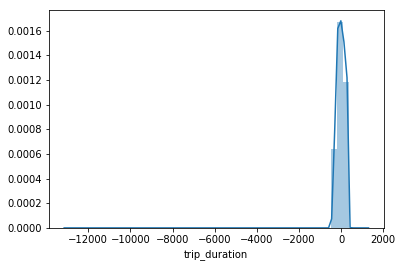

In [65]:
sns.distplot(y_test-y_predi)

In [66]:
print(np.sqrt(mean_squared_error(y_test, y_predi)))

194.48155788209402


In [67]:
scoreR2 = r2_score(y_test, y_predi)
print(scoreR2)

-0.04597199084538928


In [68]:
LinearRegre.score(X_test,y_test)

-0.04597199084538928

# Régression par forêts aléatoires

In [69]:
X = voyage.drop(['trip_duration'], axis=1) #voyage - la colonne "trip_duration"
y = voyage.trip_duration #on recupère "trip_duration" dans y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [70]:
from sklearn import ensemble
ranforest = ensemble.RandomForestRegressor()
ranforest.fit(X_train, y_train)
y_ranforest = ranforest.predict(X_test)
print(ranforest.score(X_test,y_test))

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-0.3555574772453709


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


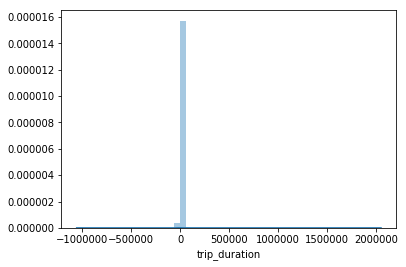

In [71]:
sns.distplot(y_test-y_ranforest)

In [72]:
print(np.sqrt(mean_squared_error(y_test, y_ranforest)))

7256.582773063585
